In [219]:
import pandas as pd
import numpy as np

import warnings
from os import listdir
from os.path import isfile, join
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import xgboost as xgb
%matplotlib inline
from matplotlib import pyplot as plt

In [286]:
# Creating a dataframe for the training data
df = pd.read_csv("2020_Fall_training_dataset/training_data.csv")

In [287]:
# printing the dimensions of the dataframe for initial research
df.shape

(424431, 69)

In [288]:
# printing the head of the dataframe
df.head()

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [289]:
# get summary statistics for the dataframe
df.describe()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
count,4.244310e+05,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,...,424431.000000,424431.000000,424431.000000,424431.0,424431.000000,424431.000000,4.244310e+05,424431.000000,4.244310e+05,424431.000000
mean,3.144874e+08,6.224701,31.051629,1996.753482,290.333958,11.192347,28.397318,3.302400,4.998798,7.037130,...,0.096454,0.119765,5.886341,2006.0,335.354228,0.046893,2.354292e+02,0.115018,2.267193e+02,1.154623
std,5.776142e+07,1.139174,4.186688,7.388605,2876.619060,4.007123,43.952581,7.698294,0.080719,2.576152,...,0.314316,0.383814,6.646432,0.0,206.291385,0.223597,3.399225e+03,1.636176,3.337804e+03,55.153868
min,1.645329e+08,6.000000,13.000000,1924.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,...,0.000000,0.000000,-1.000000,2006.0,0.540000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.832442e+08,6.000000,30.000000,1993.000000,-1.000000,8.000000,1.000000,-1.000000,5.000000,5.000000,...,0.000000,0.000000,1.200000,2006.0,157.940000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,3.326177e+08,6.000000,31.000000,1998.000000,-1.000000,11.000000,1.000000,-1.000000,5.000000,9.000000,...,0.000000,0.000000,3.500000,2006.0,328.580000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,3.612798e+08,6.000000,35.000000,2002.000000,-1.000000,14.000000,99.000000,6.000000,5.000000,9.000000,...,0.000000,0.000000,8.300000,2006.0,445.200000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
max,3.823488e+08,12.000000,37.000000,2008.000000,99999.000000,27.000000,99.000000,99.000000,9.000000,9.000000,...,2.000000,7.000000,54.000000,2006.0,3941.080000,5.000000,1.072292e+06,370.370370,1.072292e+06,24787.140000


In [290]:
df["Vehicle_Symbol"].replace(-1, np.NaN, inplace = True)
df['Vehicle_Bodily_Injury_Limit'].replace('NA', np.NaN, inplace=True)
df.dropna(subset=['Vehicle_Symbol'], inplace=True)

df = df.astype({'Vehicle_Symbol': 'int', 'Annual_Premium': 'int', 'Loss_Amount': 'int'})

In [291]:
df.shape

(424406, 69)

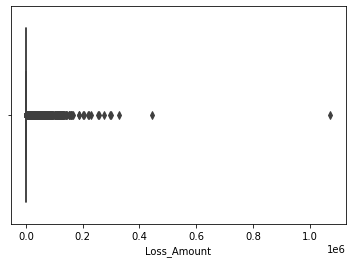

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=df['Loss_Amount'])

In [293]:
df.drop(df.loc[df['Loss_Amount']>=1000000].index, inplace=True)

In [294]:
df.shape

(424405, 69)

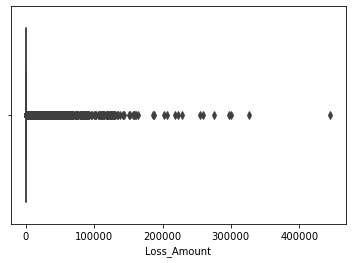

In [295]:
sns.boxplot(x=df['Loss_Amount'])



# Data Visualizations for initial analysis



In [296]:
import seaborn as sns 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

co_relation_matrix = df.corr(method = 'pearson').abs()

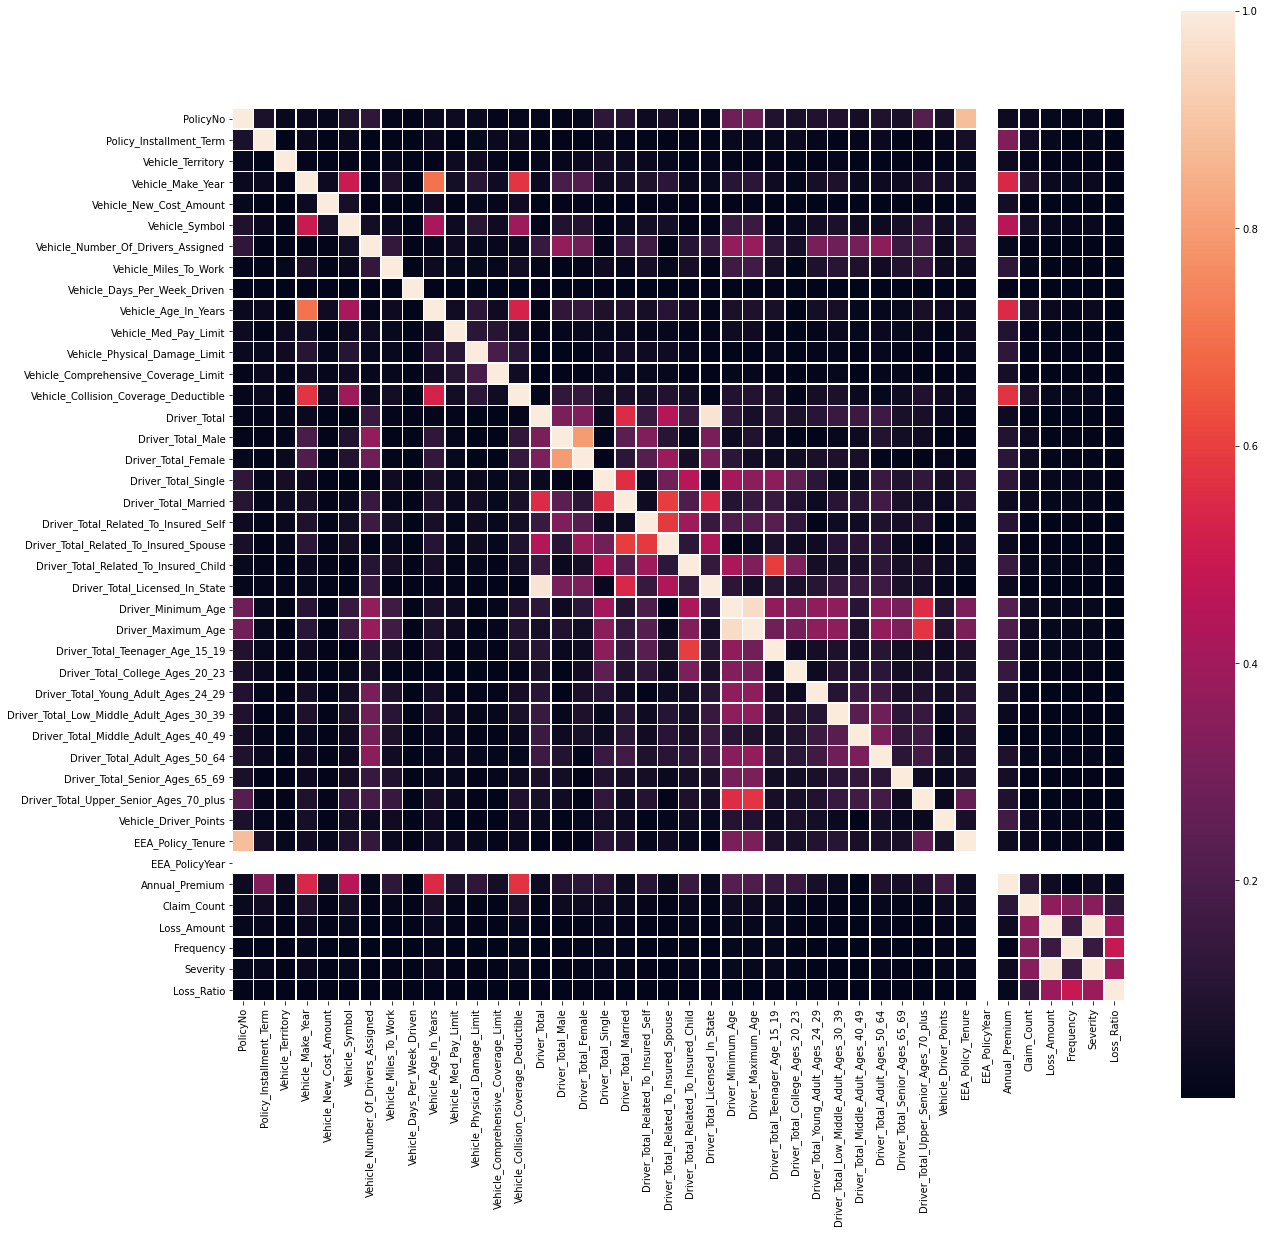

In [297]:
plt.subplots(figsize =(20, 20)) 
sns.heatmap(co_relation_matrix, square = True, linewidths = 0.5)

['Loss_Ratio', 'Frequency', 'Severity', 'Loss_Amount', 'Claim_Count', 'Annual_Premium', 'Driver_Total_Teenager_Age_15_19', 'Driver_Total_Related_To_Insured_Child', 'PolicyNo', 'Vehicle_Territory', 'Driver_Total_Female', 'Driver_Total_Single', 'Driver_Total_Licensed_In_State', 'Driver_Total', 'EEA_Policy_Tenure', 'Driver_Minimum_Age', 'Driver_Maximum_Age']


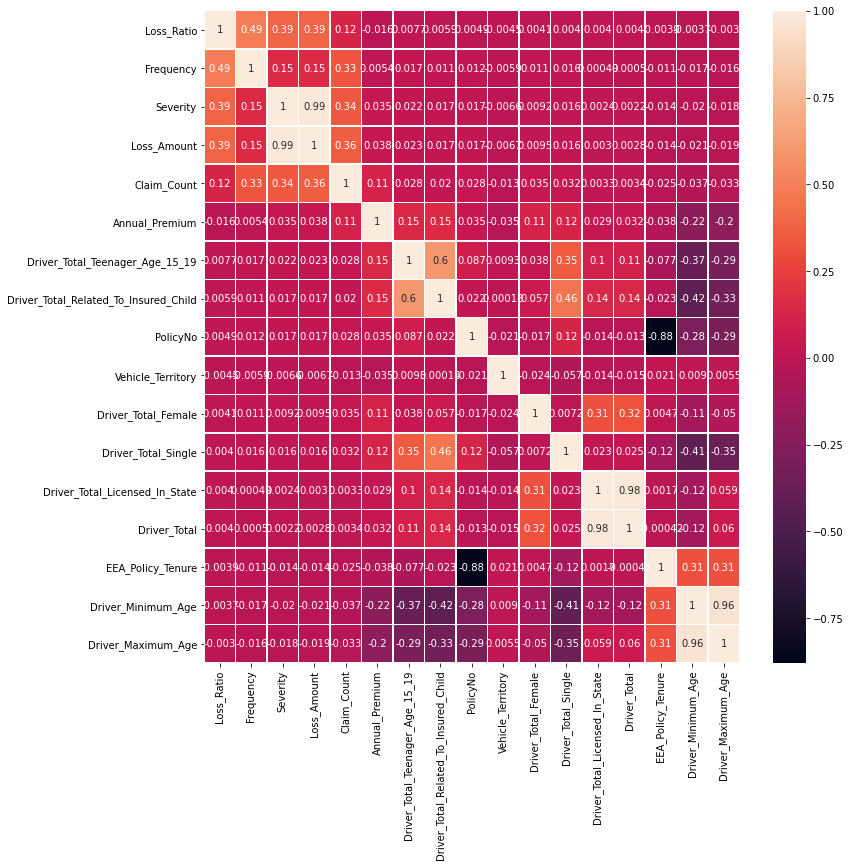

In [298]:
number_of_columns1 = 17
columns1 = co_relation_matrix.nlargest(number_of_columns1, 'Loss_Ratio')['Loss_Ratio'].index 
print(list(columns1))
co_relation_matrix1 = np.corrcoef(df[columns1].values.T) 
plt.subplots(figsize =(12, 12)) 
sns.heatmap(co_relation_matrix1,linewidths = 0.5, yticklabels = columns1.values,xticklabels = columns1.values,annot=True)

# Data Splitting

In [299]:
'''split = {}
la = df["Loss_Ratio"]
for i in range(len(list(la))):
    if la[i] in split.keys():
        split[la[i]] += 1
    else:
        split[la[i]] = 1
print(len(split))
finalS = []
for i in sorted (split) : 
    finalS.append([i, split[i]])
    print (i," , Count =  ", split[i])'''

'split = {}\nla = df["Loss_Ratio"]\nfor i in range(len(list(la))):\n    if la[i] in split.keys():\n        split[la[i]] += 1\n    else:\n        split[la[i]] = 1\nprint(len(split))\nfinalS = []\nfor i in sorted (split) : \n    finalS.append([i, split[i]])\n    print (i," , Count =  ", split[i])'

In [300]:
def trainingData_split(n):
    number_of_splits = 0
    for total in range(n):
        for split in [1000,3000,5000]:
            for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2]:
                number_of_splits += 1
                num1 = int((lr*split))
                num2 = split-num1
                lr_g_0 = df[df['Loss_Ratio'] > 0].sample(n = num1+split,random_state = 2)
                lr_e_0 = df[df['Loss_Ratio'] == 0].sample(n = num2,random_state = 2)
                final_PDF = pd.concat([lr_g_0,lr_e_0], ignore_index = True)
                final_PDF.to_csv('Training_Split/training_split_'+str(number_of_splits)+'.csv')            
trainingData_split(10)

In [301]:
def read_portfolio(portfolio_number):
    df = pd.read_csv('Training_Split/training_split_' + str(portfolio_number) + '.csv')
    
    val_VATD_NA_mean = (df['Vehicle_Anti_Theft_Device'] == 'Not Applicable').mean()
    val_VATD_NA_std = (df['Vehicle_Anti_Theft_Device'] == 'Not Applicable').std()
    
    val_VATD_Passive_mean = (df['Vehicle_Anti_Theft_Device'] == 'Passive Disabling-Vehicle Recovery').mean()
    val_VATD_Passive_std = (df['Vehicle_Anti_Theft_Device'] == 'Passive Disabling-Vehicle Recovery').std()
    
    val_VATD_Alarm_mean =  (df['Vehicle_Anti_Theft_Device'] == 'Alarm Only').mean()
    val_VATD_Alarm_std = (df['Vehicle_Anti_Theft_Device'] == 'Alarm Only').std()
    
    val_VATD_Active_mean = (df['Vehicle_Anti_Theft_Device'] == 'Active Disabling').mean()
    val_VATD_Active_std = (df['Vehicle_Anti_Theft_Device'] == 'Active Disabling').std()
    
    val_DMA_mean = df['Driver_Minimum_Age'].mean()
    val_DMA_std = df['Driver_Minimum_Age'].std()
    
    val_DMxA_mean = df['Driver_Maximum_Age'].mean()
    val_DMxA_std = df['Driver_Maximum_Age'].std()
    
    val_VAY_mean = df['Vehicle_Age_In_Years'].mean()
    val_VAY_std = df['Vehicle_Age_In_Years'].std()    
    
    val_PT_mean = df['EEA_Policy_Tenure'].mean()
    val_PT_std = df['EEA_Policy_Tenure'].std() 

    val_PIT_mean = df['Policy_Installment_Term'].mean()
    val_PIT_std = df['Policy_Installment_Term'].std()
    
    val_VT_mean = df['Vehicle_Territory'].mean()
    val_VT_std = df['Vehicle_Territory'].std()
    
    val_VMY_mean = df['Vehicle_Make_Year'].mean()
    val_VMY_std = df['Vehicle_Make_Year'].std()
    
    val_VnDA_mean = df['Vehicle_Number_Of_Drivers_Assigned'].mean()
    val_VnDA_std = df['Vehicle_Number_Of_Drivers_Assigned'].std()
    
    val_VdpwD_mean = df['Vehicle_Days_Per_Week_Driven'].mean()
    val_VdpwD_std = df['Vehicle_Days_Per_Week_Driven'].std()
    
    val_VAY_mean = df['Vehicle_Age_In_Years'].mean()
    val_VAY_std = df['Vehicle_Age_In_Years'].std()
    
    val_VMPL_mean = df['Vehicle_Med_Pay_Limit'].mean()
    val_VMPL_std = df['Vehicle_Med_Pay_Limit'].std()
    
    val_VPDL_mean = df['Vehicle_Physical_Damage_Limit'].mean()
    val_VPDL_std = df['Vehicle_Physical_Damage_Limit'].std()
    
    val_DTngA_mean = df['Driver_Total_Teenager_Age_15_19'].mean()
    val_DTngA_std = df['Driver_Total_Teenager_Age_15_19'].std()
    
    val_D203_mean = df['Driver_Total_College_Ages_20_23'].mean()
    val_D203_std = df['Driver_Total_College_Ages_20_23'].std()
    
    val_D249_mean = df['Driver_Total_Young_Adult_Ages_24_29'].mean()
    val_D249_std = df['Driver_Total_Young_Adult_Ages_24_29'].std()
    
    val_D309_mean = df['Driver_Total_Low_Middle_Adult_Ages_30_39'].mean()
    val_D309_std = df['Driver_Total_Low_Middle_Adult_Ages_30_39'].std()
    
    val_D409_mean = df['Driver_Total_Middle_Adult_Ages_40_49'].mean()
    val_D409_std = df['Driver_Total_Middle_Adult_Ages_40_49'].std()
    
    val_D5064_mean = df['Driver_Total_Adult_Ages_50_64'].mean()
    val_D5064_std = df['Driver_Total_Adult_Ages_50_64'].std()
    
    val_D659_mean = df['Driver_Total_Senior_Ages_65_69'].mean()
    val_D659_std = df['Driver_Total_Senior_Ages_65_69'].std()
    
    val_VDP_mean = df['Vehicle_Driver_Points'].mean()
    val_VDP_std = df['Vehicle_Driver_Points'].std()   # 
    
    val_DTM_mean = df['Driver_Total_Married'].mean()
    val_DTM_std = df['Driver_Total_Married'].std()
    
    val_VMW_mean = df['Vehicle_Miles_To_Work'].mean()
    val_VMW_std = df['Vehicle_Miles_To_Work'].std()
    
    val_CC_mean = df['Claim_Count'].mean()
    val_CC_std = df['Claim_Count'].std()
  #############  
    val_VS_mean = df['Vehicle_Symbol'].mean()
    val_VS_std = df['Vehicle_Symbol'].std()
    
    val_VCC_mean = df['Vehicle_Collision_Coverage_Deductible'].mean()
    val_VCC_std = df['Vehicle_Collision_Coverage_Deductible'].std()
    
    val_AP_mean = df['Annual_Premium'].mean()
    val_AP_std = df['Annual_Premium'].std()
    val_AP_sum = df['Annual_Premium'].sum()
    
    val_LA = df['Loss_Amount'].mean()
    
    ln_LR = np.log( df['Loss_Amount'].sum()/df['Annual_Premium'].sum() )
    
    row = {'Training_portfolio': str(portfolio_number), 
           'VATD_NA_mean': val_VATD_NA_mean, 
           'VATD_NA_std': val_VATD_NA_std,
           'VATD_Passive_mean': val_VATD_Passive_mean,
           'VATD_Passive_std': val_VATD_Passive_std,
           'VATD_Alarm_mean': val_VATD_Alarm_mean,
           'VATD_Alarm_std': val_VATD_Alarm_std,
           'VATD_Active_mean': val_VATD_Active_mean,
           'VATD_Active_std': val_VATD_Active_std,
           'Driver_Min_Age_mean': val_DMA_mean,
           'Driver_Min_Age_std': val_DMA_std,
           'Driver_Max_Age_mean': val_DMxA_mean,
           'Driver_Max_Age_std': val_DMxA_std,
           #'Vehicle_Age_Years_mean': val_VAY_mean,
           #'Vehicle_Age_Years_std': val_VAY_std,
           'EEA_Policy_Tenure_mean': val_PT_mean,
           'EEA_Policy_Tenure_std': val_PT_std,           
           'Policy_InstallmentTerm_Mean':val_PIT_mean,
           'Policy_InstallmentTerm_std':val_PIT_std,           
           'Vehicle_Territory_mean':val_VT_mean,
           'Vehicle_Territory_std':val_VT_std,
           'Vehicle_Make_Year_mean':val_VMY_mean,
           'Vehicle_Make_Year_std':val_VMY_std,
           'Vehicle_Number_Of_Drivers_Assigned_mean':val_VnDA_mean,
           'Vehicle_Number_Of_Drivers_Assigned_std':val_VnDA_std,
           'Vehicle_Days_Per_Week_Driven_mean':val_VdpwD_mean,
           'Vehicle_Days_Per_Week_Driven_std':val_VdpwD_std,
           'Vehicle_Age_In_Years_mean':val_VAY_mean,
           'Vehicle_Age_In_Years_std':val_VAY_std,
           'Vehicle_Med_Pay_Limit_mean':val_VMPL_mean,
           'Vehicle_Med_Pay_Limit_std':val_VMPL_std,
           'Vehicle_Physical_Damage_Limit_mean':val_VPDL_mean,
           'Vehicle_Physical_Damage_Limit_std':val_VPDL_std,
           'Driver_Total_Teenager_Age_15_19_mean':val_DTngA_mean,
           'Driver_Total_Teenager_Age_15_19_std':val_DTngA_std,
           'Driver_Total_College_Ages_20_23_mean':val_D203_mean,
           'Driver_Total_College_Ages_20_23_std':val_D203_std,
           'Driver_Total_Young_Adult_Ages_24_29_mean':val_D249_mean,
           'Driver_Total_Young_Adult_Ages_24_29_std':val_D249_std,
           'Driver_Total_Low_Middle_Adult_Ages_30_39_mean':val_D309_mean,
           'Driver_Total_Low_Middle_Adult_Ages_30_39_std':val_D309_std,
           'Driver_Total_Middle_Adult_Ages_40_49_mean':val_D409_mean,
           'Driver_Total_Middle_Adult_Ages_40_49_std':val_D409_std,
           'Driver_Total_Adult_Ages_50_64_mean':val_D5064_mean,
           'Driver_Total_Adult_Ages_50_64_std':val_D5064_std,
           'Driver_Total_Senior_Ages_65_69_mean':val_D659_mean,
           'Driver_Total_Senior_Ages_65_69_std':val_D659_std,
           'Vehicle_Driver_Points_mean':val_VDP_mean,
           'Vehicle_Driver_Points_std':val_VDP_std,
           'Annual_Premium_mean':val_AP_mean,
           'Annual_Premium_std':val_AP_std,
           'Driver_Total_Married_mean': val_DTM_mean,
           'Driver_Total_Married_std': val_DTM_std,
           'Vehicle_Miles_To_Work_mean': val_VMW_mean,
           'Vehicle_Miles_To_Work_std': val_VMW_std,
           'Claim_Count_mean': val_CC_mean,
           'Claim_Count_std': val_CC_std,
           
           'Vehicle_Symbol_mean': val_VS_mean,
           'Vehicle_Symbol_std': val_VS_std,
           'Vehicle_Collision_Coverage_Deductible_mean': val_VCC_mean,
           'Vehicle_Collision_Coverage_Deductible_std': val_VCC_std,
           #'Annual_Premium_sum':val_AP_sum,
           'Loss_Amount_mean' :val_LA,
           'ln_LR': ln_LR
          }   
    return row

summary_portfolios_df = pd.DataFrame()
for i in range(330):
    file = read_portfolio(i+1)
    summary_portfolios_df = summary_portfolios_df.append(file, ignore_index=True)
summary_portfolios_df = summary_portfolios_df.set_index('Training_portfolio')
summary_portfolios_df.head()

,Annual_Premium_mean,Annual_Premium_std,Claim_Count_mean,Claim_Count_std,Driver_Max_Age_mean,Driver_Max_Age_std,Driver_Min_Age_mean,Driver_Min_Age_std,Driver_Total_Adult_Ages_50_64_mean,Driver_Total_Adult_Ages_50_64_std,...,Vehicle_Miles_To_Work_std,Vehicle_Number_Of_Drivers_Assigned_mean,Vehicle_Number_Of_Drivers_Assigned_std,Vehicle_Physical_Damage_Limit_mean,Vehicle_Physical_Damage_Limit_std,Vehicle_Symbol_mean,Vehicle_Symbol_std,Vehicle_Territory_mean,Vehicle_Territory_std,ln_LR
Training_portfolio,,,,,,,,,,,,,,,,,,,,,
1,384.4550,224.723595,0.538,0.569841,46.013,15.711119,44.8935,16.041721,0.2835,0.481917,...,7.736596,27.7950,43.645543,48389.9605,40261.609772,11.5035,3.828357,30.8885,4.321621,1.982174
2,385.0980,224.869412,0.543,0.569485,45.968,15.745918,44.8865,16.056199,0.2815,0.481013,...,7.745821,27.7950,43.645543,48419.9600,40515.777640,11.5235,3.819259,30.8860,4.320687,2.004298
3,383.7945,222.358523,0.548,0.569085,45.979,15.757370,44.8940,16.071649,0.2810,0.480785,...,7.743287,27.7955,43.645242,48482.4605,40537.453873,11.5285,3.816080,30.8805,4.325225,2.021922
4,383.4055,222.413367,0.553,0.568641,45.992,15.775467,44.9145,16.088120,0.2810,0.480785,...,7.747347,27.7955,43.645242,48399.9605,40512.522211,11.5245,3.813485,30.8915,4.298601,2.027141
5,383.5135,222.300690,0.558,0.568153,45.946,15.815472,44.8700,16.123495,0.2805,0.480557,...,7.748598,27.7465,43.620266,48312.4600,40311.676031,11.5270,3.815960,30.8960,4.295510,2.040654


In [302]:
# save the summary to csv
summary_portfolios_df.to_csv('summary_portfolios.csv')

# Building Models

In [303]:
summary_portfolios_df.head()

,Annual_Premium_mean,Annual_Premium_std,Claim_Count_mean,Claim_Count_std,Driver_Max_Age_mean,Driver_Max_Age_std,Driver_Min_Age_mean,Driver_Min_Age_std,Driver_Total_Adult_Ages_50_64_mean,Driver_Total_Adult_Ages_50_64_std,...,Vehicle_Miles_To_Work_std,Vehicle_Number_Of_Drivers_Assigned_mean,Vehicle_Number_Of_Drivers_Assigned_std,Vehicle_Physical_Damage_Limit_mean,Vehicle_Physical_Damage_Limit_std,Vehicle_Symbol_mean,Vehicle_Symbol_std,Vehicle_Territory_mean,Vehicle_Territory_std,ln_LR
Training_portfolio,,,,,,,,,,,,,,,,,,,,,
1,384.4550,224.723595,0.538,0.569841,46.013,15.711119,44.8935,16.041721,0.2835,0.481917,...,7.736596,27.7950,43.645543,48389.9605,40261.609772,11.5035,3.828357,30.8885,4.321621,1.982174
2,385.0980,224.869412,0.543,0.569485,45.968,15.745918,44.8865,16.056199,0.2815,0.481013,...,7.745821,27.7950,43.645543,48419.9600,40515.777640,11.5235,3.819259,30.8860,4.320687,2.004298
3,383.7945,222.358523,0.548,0.569085,45.979,15.757370,44.8940,16.071649,0.2810,0.480785,...,7.743287,27.7955,43.645242,48482.4605,40537.453873,11.5285,3.816080,30.8805,4.325225,2.021922
4,383.4055,222.413367,0.553,0.568641,45.992,15.775467,44.9145,16.088120,0.2810,0.480785,...,7.747347,27.7955,43.645242,48399.9605,40512.522211,11.5245,3.813485,30.8915,4.298601,2.027141
5,383.5135,222.300690,0.558,0.568153,45.946,15.815472,44.8700,16.123495,0.2805,0.480557,...,7.748598,27.7465,43.620266,48312.4600,40311.676031,11.5270,3.815960,30.8960,4.295510,2.040654


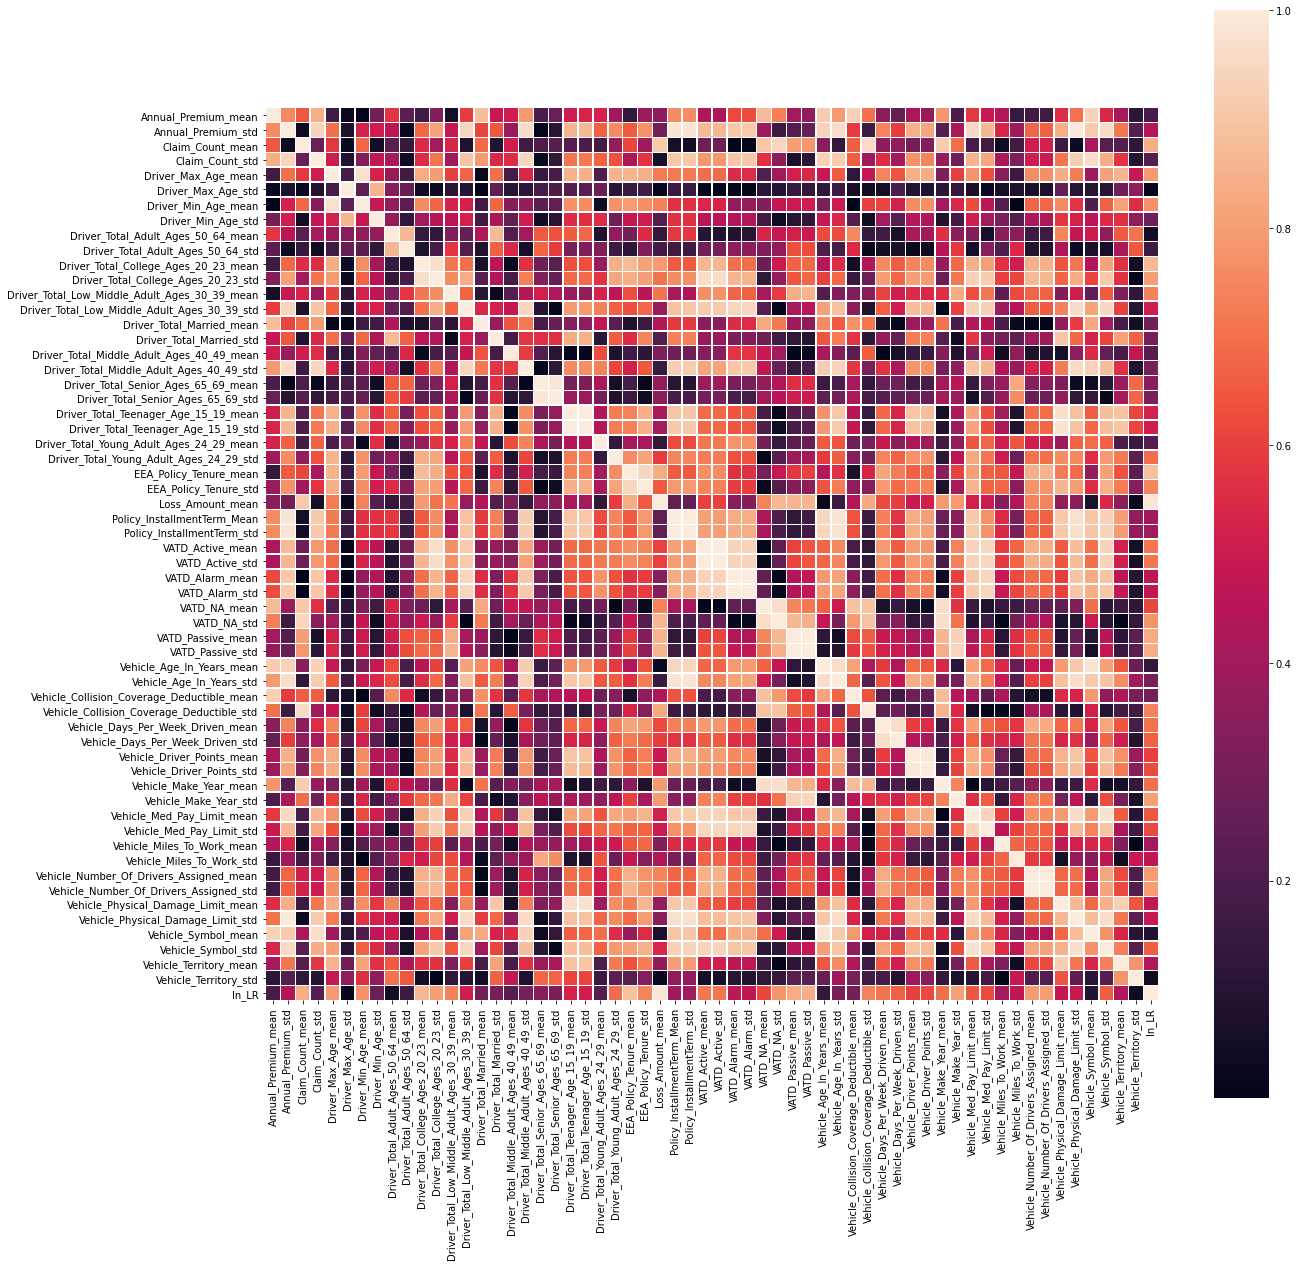

In [304]:
cr_matrix = summary_portfolios_df.corr(method='pearson').abs()
plt.subplots(figsize =(20, 20)) 
sns.heatmap(cr_matrix, square = True, linewidths = 0.5)

['Loss_Amount_mean', 'ln_LR', 'Claim_Count_mean', 'VATD_NA_std', 'VATD_Passive_mean', 'VATD_Passive_std', 'EEA_Policy_Tenure_mean', 'Vehicle_Collision_Coverage_Deductible_std', 'Driver_Total_College_Ages_20_23_mean', 'Vehicle_Make_Year_std']


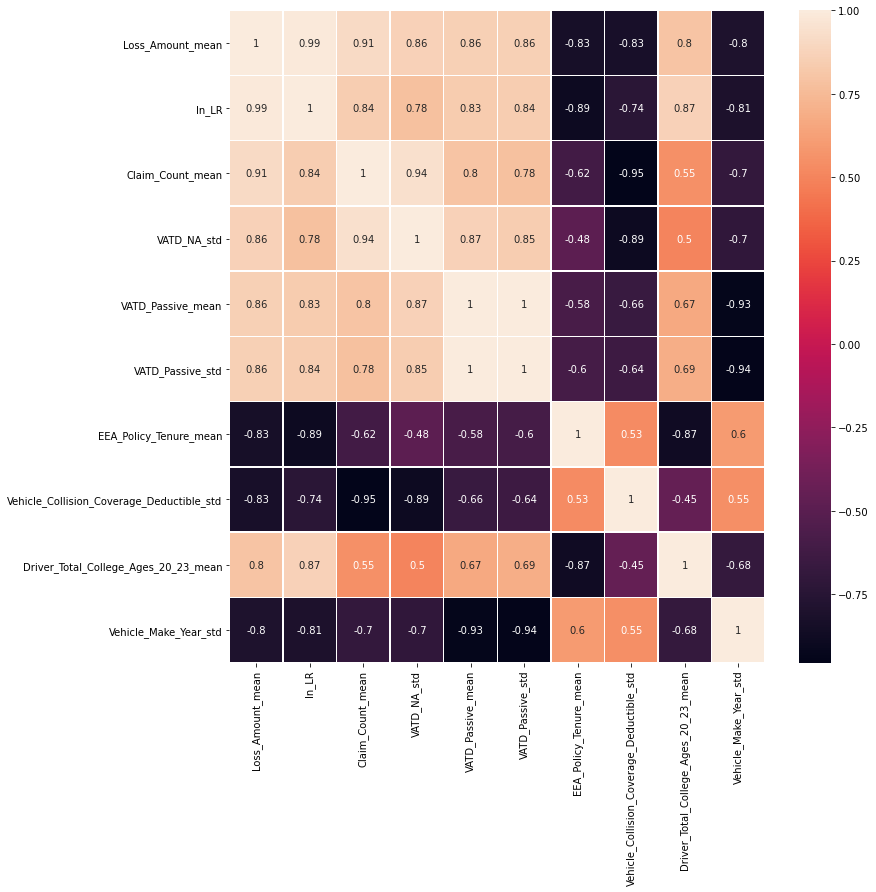

In [306]:
number_of_columns = 10
columns = cr_matrix.nlargest(number_of_columns, 'Loss_Amount_mean')['Loss_Amount_mean'].index 
print(list(columns))
cr_matrix1 = np.corrcoef(summary_portfolios_df[columns].values.T) 
plt.subplots(figsize =(12, 12)) 
sns.heatmap(cr_matrix1,linewidths = 0.5, yticklabels = columns.values,xticklabels = columns.values,annot=True)

In [307]:
final_training_df = pd.read_csv('summary_portfolios.csv', index_col = 'Training_portfolio')
final_training_df.head()

,Annual_Premium_mean,Annual_Premium_std,Claim_Count_mean,Claim_Count_std,Driver_Max_Age_mean,Driver_Max_Age_std,Driver_Min_Age_mean,Driver_Min_Age_std,Driver_Total_Adult_Ages_50_64_mean,Driver_Total_Adult_Ages_50_64_std,...,Vehicle_Miles_To_Work_std,Vehicle_Number_Of_Drivers_Assigned_mean,Vehicle_Number_Of_Drivers_Assigned_std,Vehicle_Physical_Damage_Limit_mean,Vehicle_Physical_Damage_Limit_std,Vehicle_Symbol_mean,Vehicle_Symbol_std,Vehicle_Territory_mean,Vehicle_Territory_std,ln_LR
Training_portfolio,,,,,,,,,,,,,,,,,,,,,
1,384.4550,224.723595,0.538,0.569841,46.013,15.711119,44.8935,16.041721,0.2835,0.481917,...,7.736596,27.7950,43.645543,48389.9605,40261.609772,11.5035,3.828357,30.8885,4.321621,1.982174
2,385.0980,224.869412,0.543,0.569485,45.968,15.745918,44.8865,16.056199,0.2815,0.481013,...,7.745821,27.7950,43.645543,48419.9600,40515.777640,11.5235,3.819259,30.8860,4.320687,2.004298
3,383.7945,222.358523,0.548,0.569085,45.979,15.757370,44.8940,16.071649,0.2810,0.480785,...,7.743287,27.7955,43.645242,48482.4605,40537.453873,11.5285,3.816080,30.8805,4.325225,2.021922
4,383.4055,222.413367,0.553,0.568641,45.992,15.775467,44.9145,16.088120,0.2810,0.480785,...,7.747347,27.7955,43.645242,48399.9605,40512.522211,11.5245,3.813485,30.8915,4.298601,2.027141
5,383.5135,222.300690,0.558,0.568153,45.946,15.815472,44.8700,16.123495,0.2805,0.480557,...,7.748598,27.7465,43.620266,48312.4600,40311.676031,11.5270,3.815960,30.8960,4.295510,2.040654


In [308]:
col_list = final_training_df.columns.tolist()
comp_col = list(columns)
comp_col.append('Annual_Premium_mean')
for col in col_list:
    if col not in comp_col:
        final_training_df = final_training_df.drop(columns =[col])
final_training_df = final_training_df.drop(columns =['ln_LR'])

In [309]:
final_training_df.head()

,Annual_Premium_mean,Claim_Count_mean,Driver_Total_College_Ages_20_23_mean,EEA_Policy_Tenure_mean,Loss_Amount_mean,VATD_NA_std,VATD_Passive_mean,VATD_Passive_std,Vehicle_Collision_Coverage_Deductible_std,Vehicle_Make_Year_std
Training_portfolio,,,,,,,,,,
1,384.4550,0.538,0.0560,5.49245,2790.5690,0.499254,0.3675,0.482245,265.290511,6.463079
2,385.0980,0.543,0.0565,5.48835,2857.7675,0.499395,0.3695,0.482790,264.612890,6.426016
3,383.7945,0.548,0.0555,5.46745,2898.7335,0.499368,0.3695,0.482790,264.295632,6.428401
4,383.4055,0.553,0.0550,5.48720,2910.9490,0.499368,0.3695,0.482790,264.364957,6.403605
5,383.5135,0.558,0.0560,5.46785,2951.3810,0.499395,0.3710,0.483193,264.518889,6.405679


In [310]:
final_training_df.shape

(330, 10)

In [311]:
final_training_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 1 to 330
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Annual_Premium_mean                        330 non-null    float64
 1   Claim_Count_mean                           330 non-null    float64
 2   Driver_Total_College_Ages_20_23_mean       330 non-null    float64
 3   EEA_Policy_Tenure_mean                     330 non-null    float64
 4   Loss_Amount_mean                           330 non-null    float64
 5   VATD_NA_std                                330 non-null    float64
 6   VATD_Passive_mean                          330 non-null    float64
 7   VATD_Passive_std                           330 non-null    float64
 8   Vehicle_Collision_Coverage_Deductible_std  330 non-null    float64
 9   Vehicle_Make_Year_std                      330 non-null    float64
dtypes: float64(10)
memory usag

In [312]:
X_train, X_valid, Y_train, Y_valid = train_test_split(final_training_df.drop(['Loss_Amount_mean'],axis=1), final_training_df['Loss_Amount_mean'], test_size = 0.33)

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_valid_scaled = sc.fit_transform(X_valid)

   ## 1. Linear Regression Model

In [313]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)

LinearRegression()

MSE : 377.2974609187932
RMSE : 19.424146336938286
MAE :  14.782225680921783
R^2 score:   0.9878005098906082


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y for training set')

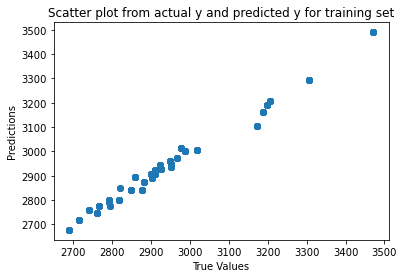

In [314]:
Y_train_predict = model_1.predict(X_train)
r2 = r2_score(Y_train, Y_train_predict)

mse = np.mean((Y_train - Y_train_predict)**2, axis = None)
print("MSE :", mse)

rmse = np.sqrt(mean_squared_error(Y_train,Y_train_predict))
print("RMSE :", rmse)

mae = mean_absolute_error(Y_train, Y_train_predict)
print("MAE : ", mae)

print('R^2 score:  ',r2)

plt.scatter(Y_train, Y_train_predict)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Scatter plot from actual y and predicted y for training set')

MSE : 554.8560441386156
RMSE : 23.555382487631476
MAE :  17.993518865788776
R^2 score:   0.9819733094593132


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y for validation set')

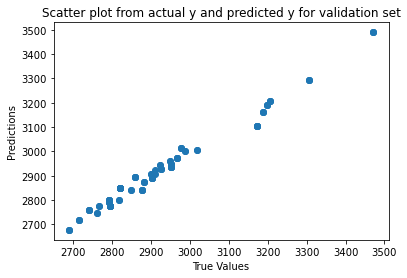

In [315]:
Y_valid_predict = model_1.predict(X_valid)
r2 = r2_score(Y_valid, Y_valid_predict)

mse = np.mean((Y_valid - Y_valid_predict)**2, axis = None)

print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(Y_valid, Y_valid_predict)
print("MAE : ", mae)

print('R^2 score:  ',r2)

plt.scatter(Y_valid, Y_valid_predict)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Scatter plot from actual y and predicted y for validation set')

0.9754003766578221
MSE : 757.1689137356599
RMSE : 27.51670245025119
MAE :  22.10051950506472
R^2 score:   0.9819733094593132


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y for validation set')

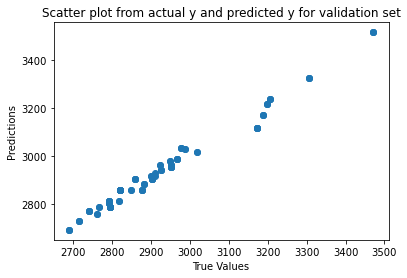

In [316]:
from sklearn.linear_model import LassoCV
l1_cv = LassoCV(cv=None,max_iter = 1000).fit(X_train_scaled,Y_train)
print(l1_cv.score(X_valid_scaled,Y_valid))

Y_l1_cv_predict = l1_cv.predict(X_valid_scaled)
r2 = r2_score(Y_valid, Y_valid_predict)

mse = np.mean((Y_valid - Y_l1_cv_predict)**2, axis = None)

print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(Y_valid, Y_l1_cv_predict)
print("MAE : ", mae)

print('R^2 score:  ',r2)

plt.scatter(Y_valid, Y_l1_cv_predict)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Scatter plot from actual y and predicted y for validation set')

# SGD Regression

MSE : 539.489557975601
RMSE : 23.226914516904756
MAE :  17.091630131327094
R^2 score:   0.9825562103953303


Text(0.5, 1.0, 'Scatter plot from actual y and predicted y for training set')

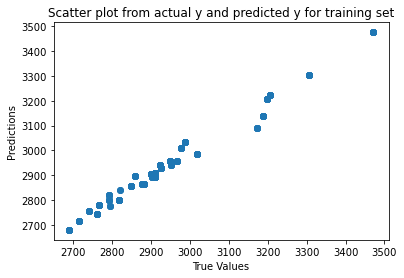

In [317]:
from sklearn.linear_model import SGDRegressor
n_iter=50
SGD = SGDRegressor(max_iter=n_iter)

SGD.fit(X_train_scaled, Y_train)

y_train_sgd_pred = SGD.predict(X_train_scaled)

r2 = r2_score(Y_train, y_train_sgd_pred)

mse = np.mean((Y_train - y_train_sgd_pred)**2, axis = None)
print("MSE :", mse)

rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(Y_train, y_train_sgd_pred)
print("MAE : ", mae)

print('R^2 score:  ',r2)

plt.scatter(Y_train, y_train_sgd_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title('Scatter plot from actual y and predicted y for training set')



MSE : 865.8101284010371
RMSE : 29.42465171248484
MAE :  23.59619905835234
r2 score : 0.9718707376146403


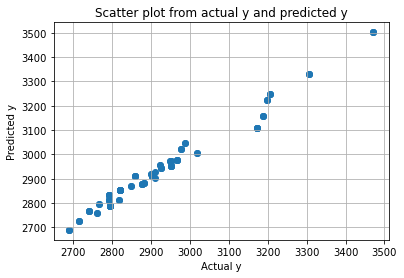

In [318]:
y_valid_sgd_pred=SGD.predict(X_valid_scaled)
# calculating the mean squared error
mse = np.mean((Y_valid - y_valid_sgd_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(Y_valid, y_valid_sgd_pred)
print("MAE : ", mae)

# Calculating the r2 score
r2 = r2_score(Y_valid, y_valid_sgd_pred)
print("r2 score :", r2)

plt.scatter(Y_valid, y_valid_sgd_pred)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

MSE : 30.367544242528567
RMSE : 5.510675479696529
MAE :  3.0395602206962926
r2 score : 0.9990133903589524


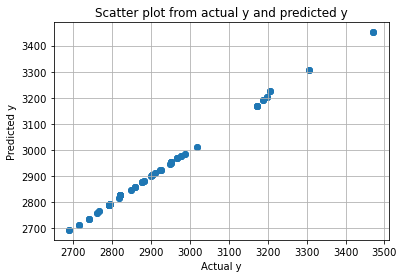

In [319]:
import lightgbm as lgb
boost1  = lgb.LGBMRegressor()
boost1.fit(X_train, Y_train)

Ytest_predict_boost1 = boost1.predict(X_valid)

mse = np.mean((Y_valid - Ytest_predict_boost1)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(Y_valid, Ytest_predict_boost1)
print("MAE : ", mae)

# Calculating the r2 score
r2 = r2_score(Y_valid, Ytest_predict_boost1)
print("r2 score :", r2)

plt.scatter(Y_valid, Ytest_predict_boost1)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

MSE : 1347.4837536937873
RMSE : 36.70808839607134
MAE :  22.6586096979614
r2 score : 0.9562216670557298


Text(0, 0.5, 'Predictions')

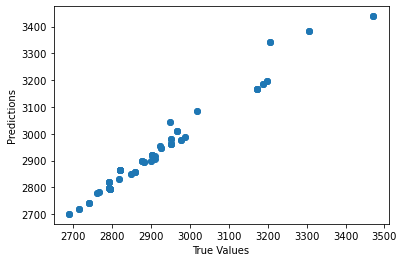

In [320]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor(n_estimators = 1000, max_depth = 10, n_jobs = -5)
# feeding the training data to the model
model.fit(X_train_scaled, Y_train)

# predicting the test set results
Y_pred = model.predict(X_valid_scaled)

# calculating the mean squared error
mse = np.mean((Y_valid - Y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

mae = mean_absolute_error(Y_valid, Y_pred)
print("MAE : ", mae)

# Calculating the r2 score
r2 = r2_score(Y_valid, Y_pred)
print("r2 score :", r2)

plt.scatter(Y_valid, Y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [321]:
predictions = []
loss_amount = []
portfolio_names = []

testing_summary_df = pd.DataFrame()

mypath = "2020_Fall_testing_portfolios/testing_portfolios"
test_portfolios = [f for f in listdir(mypath) if isfile(join(mypath, f))]

#print(len(portfolios))

for i in range(1, len(test_portfolios)+1):   
    
    temp = test_portfolios[i-1].split("_")
    tn = temp[-1]
    num = tn.split(".")
    name = str(temp[1]+"_"+num[0])
    portfolio_names.append(name)

    t_df = pd.read_csv(mypath + '/' + test_portfolios[i-1])
    '''col_s = t_df.columns.tolist()
    for col in col_s:
        t_df[col].replace(-1, np.NaN, inplace = True)
    t_df['Vehicle_Bodily_Injury_Limit'].replace('NA', np.NaN, inplace=True)
    t_df.dropna(subset=['Vehicle_Symbol'], inplace=True)
'''
    
    T_val_VATD_NA_mean = (t_df['Vehicle_Anti_Theft_Device'] == 'Not Applicable').mean()
    T_val_VATD_NA_std = (t_df['Vehicle_Anti_Theft_Device'] == 'Not Applicable').std()
    
    T_val_VATD_Passive_mean = (t_df['Vehicle_Anti_Theft_Device'] == 'Passive Disabling-Vehicle Recovery').mean()
    T_val_VATD_Passive_std = (t_df['Vehicle_Anti_Theft_Device'] == 'Passive Disabling-Vehicle Recovery').std()
    
    T_val_VATD_Alarm_mean =  (t_df['Vehicle_Anti_Theft_Device'] == 'Alarm Only').mean()
    T_val_VATD_Alarm_std = (t_df['Vehicle_Anti_Theft_Device'] == 'Alarm Only').std()
    
    T_val_VATD_Active_mean = (t_df['Vehicle_Anti_Theft_Device'] == 'Active Disabling').mean()
    T_val_VATD_Active_std = (t_df['Vehicle_Anti_Theft_Device'] == 'Active Disabling').std()
    
    T_val_DMA_mean = t_df['Driver_Minimum_Age'].mean()
    T_val_DMA_std = t_df['Driver_Minimum_Age'].std()
    
    T_val_DMxA_mean = t_df['Driver_Maximum_Age'].mean()
    T_val_DMxA_std = t_df['Driver_Maximum_Age'].std()
    
    T_val_VAY_mean = t_df['Vehicle_Age_In_Years'].mean()
    T_val_VAY_std = t_df['Vehicle_Age_In_Years'].std()    
    
    T_val_PT_mean = t_df['EEA_Policy_Tenure'].mean()
    T_val_PT_std = t_df['EEA_Policy_Tenure'].std() 

    T_val_PIT_mean = t_df['Policy_Installment_Term'].mean()
    T_val_PIT_std = t_df['Policy_Installment_Term'].std()
    
    T_val_VT_mean = t_df['Vehicle_Territory'].mean()
    T_val_VT_std = t_df['Vehicle_Territory'].std()
    
    T_val_VMY_mean = t_df['Vehicle_Make_Year'].mean()
    T_val_VMY_std = t_df['Vehicle_Make_Year'].std()
    
    T_val_VnDA_mean = t_df['Vehicle_Number_Of_Drivers_Assigned'].mean()
    T_val_VnDA_std = t_df['Vehicle_Number_Of_Drivers_Assigned'].std()
    
    T_val_VdpwD_mean = t_df['Vehicle_Days_Per_Week_Driven'].mean()
    T_val_VdpwD_std = t_df['Vehicle_Days_Per_Week_Driven'].std()
    
    T_val_VAY_mean = t_df['Vehicle_Age_In_Years'].mean()
    T_val_VAY_std = t_df['Vehicle_Age_In_Years'].std()
    
    T_val_VMPL_mean = t_df['Vehicle_Med_Pay_Limit'].mean()
    T_val_VMPL_std = t_df['Vehicle_Med_Pay_Limit'].std()
    
    T_val_VPDL_mean = t_df['Vehicle_Physical_Damage_Limit'].mean()
    T_val_VPDL_std = t_df['Vehicle_Physical_Damage_Limit'].std()
    
    T_val_DTngA_mean = t_df['Driver_Total_Teenager_Age_15_19'].mean()
    T_val_DTngA_std = t_df['Driver_Total_Teenager_Age_15_19'].std()
    
    T_val_D203_mean = t_df['Driver_Total_College_Ages_20_23'].mean()
    T_val_D203_std = t_df['Driver_Total_College_Ages_20_23'].std()
    
    T_val_D249_mean = t_df['Driver_Total_Young_Adult_Ages_24_29'].mean()
    T_val_D249_std = t_df['Driver_Total_Young_Adult_Ages_24_29'].std()
    
    T_val_D309_mean = t_df['Driver_Total_Low_Middle_Adult_Ages_30_39'].mean()
    T_val_D309_std = t_df['Driver_Total_Low_Middle_Adult_Ages_30_39'].std()
    
    T_val_D409_mean = t_df['Driver_Total_Middle_Adult_Ages_40_49'].mean()
    T_val_D409_std = t_df['Driver_Total_Middle_Adult_Ages_40_49'].std()
    
    T_val_D5064_mean = t_df['Driver_Total_Adult_Ages_50_64'].mean()
    T_val_D5064_std = t_df['Driver_Total_Adult_Ages_50_64'].std()
    
    T_val_D659_mean = t_df['Driver_Total_Senior_Ages_65_69'].mean()
    T_val_D659_std = t_df['Driver_Total_Senior_Ages_65_69'].std()
    
    T_val_VDP_mean = t_df['Vehicle_Driver_Points'].mean()
    T_val_VDP_std = t_df['Vehicle_Driver_Points'].std()    
    
    T_val_DTM_mean = df['Driver_Total_Married'].mean()
    T_val_DTM_std = df['Driver_Total_Married'].std()
    
    T_val_VMW_mean = df['Vehicle_Miles_To_Work'].mean()
    T_val_VMW_std = df['Vehicle_Miles_To_Work'].std()
    
    T_val_CC_mean = df['Claim_Count'].mean()
    T_val_CC_std = df['Claim_Count'].std()
    
    T_val_VS_mean = df['Vehicle_Symbol'].mean()
    T_val_VS_std = df['Vehicle_Symbol'].std()
    
    T_val_VCC_mean = df['Vehicle_Collision_Coverage_Deductible'].mean()
    T_val_VCC_std = df['Vehicle_Collision_Coverage_Deductible'].std()
        
    T_val_AP_mean = t_df['Annual_Premium'].mean()
    T_val_AP_std = t_df['Annual_Premium'].std()
    T_val_AP_sum = df['Annual_Premium'].sum()
    
    T_row = {'Testing_portfolio': str(num[0]), 
           'VATD_NA_mean':  T_val_VATD_NA_mean, 
           'VATD_NA_std':  T_val_VATD_NA_std,
           'VATD_Passive_mean':  T_val_VATD_Passive_mean,
           'VATD_Passive_std':  T_val_VATD_Passive_std,
           'VATD_Alarm_mean':  T_val_VATD_Alarm_mean,
           'VATD_Alarm_std':  T_val_VATD_Alarm_std,
           'VATD_Active_mean':  T_val_VATD_Active_mean,
           'VATD_Active_std':  T_val_VATD_Active_std,
           'Driver_Min_Age_mean':  T_val_DMA_mean,
           'Driver_Min_Age_std':  T_val_DMA_std,
           'Driver_Max_Age_mean':  T_val_DMxA_mean,
           'Driver_Max_Age_std':  T_val_DMxA_std,
           #'Vehicle_Age_Years_mean':  T_val_VAY_mean,
           #'Vehicle_Age_Years_std':  T_val_VAY_std,
           'EEA_Policy_Tenure_mean':  T_val_PT_mean,
           'EEA_Policy_Tenure_std':  T_val_PT_std,           
           'Policy_InstallmentTerm_Mean': T_val_PIT_mean,
           'Policy_InstallmentTerm_std': T_val_PIT_std,           
           'Vehicle_Territory_mean': T_val_VT_mean,
           'Vehicle_Territory_std': T_val_VT_std,
           'Vehicle_Make_Year_mean': T_val_VMY_mean,
           'Vehicle_Make_Year_std': T_val_VMY_std,
           'Vehicle_Number_Of_Drivers_Assigned_mean': T_val_VnDA_mean,
           'Vehicle_Number_Of_Drivers_Assigned_std': T_val_VnDA_std,
           'Vehicle_Days_Per_Week_Driven_mean': T_val_VdpwD_mean,
           'Vehicle_Days_Per_Week_Driven_std': T_val_VdpwD_std,
           'Vehicle_Age_In_Years_mean': T_val_VAY_mean,
           'Vehicle_Age_In_Years_std': T_val_VAY_std,
           'Vehicle_Med_Pay_Limit_mean': T_val_VMPL_mean,
           'Vehicle_Med_Pay_Limit_std': T_val_VMPL_std,
           'Vehicle_Physical_Damage_Limit_mean': T_val_VPDL_mean,
           'Vehicle_Physical_Damage_Limit_std': T_val_VPDL_std,
           'Driver_Total_Teenager_Age_15_19_mean': T_val_DTngA_mean,
           'Driver_Total_Teenager_Age_15_19_std': T_val_DTngA_std,
           'Driver_Total_College_Ages_20_23_mean': T_val_D203_mean,
           'Driver_Total_College_Ages_20_23_std': T_val_D203_std,
           'Driver_Total_Young_Adult_Ages_24_29_mean': T_val_D249_mean,
           'Driver_Total_Young_Adult_Ages_24_29_std': T_val_D249_std,
           'Driver_Total_Low_Middle_Adult_Ages_30_39_mean': T_val_D309_mean,
           'Driver_Total_Low_Middle_Adult_Ages_30_39_std': T_val_D309_std,
           'Driver_Total_Middle_Adult_Ages_40_49_mean': T_val_D409_mean,
           'Driver_Total_Middle_Adult_Ages_40_49_std': T_val_D409_std,
           'Driver_Total_Adult_Ages_50_64_mean': T_val_D5064_mean,
           'Driver_Total_Adult_Ages_50_64_std': T_val_D5064_std,
           'Driver_Total_Senior_Ages_65_69_mean': T_val_D659_mean,
           'Driver_Total_Senior_Ages_65_69_std': T_val_D659_std,
           'Vehicle_Driver_Points_mean': T_val_VDP_mean,
           'Vehicle_Driver_Points_std': T_val_VDP_std,
           'Annual_Premium_mean': T_val_AP_mean,
           #'Annual_Premium_std': T_val_AP_std,
           'Annual_Premium_sum':T_val_AP_sum,
           'Driver_Total_Married_mean': T_val_DTM_mean,
           'Driver_Total_Married_std': T_val_DTM_std,
           'Vehicle_Miles_To_Work_mean': T_val_VMW_mean,
           'Vehicle_Miles_To_Work_std': T_val_VMW_std,
           'Claim_Count_mean': T_val_CC_mean,
           'Claim_Count_std': T_val_CC_std,
           'Vehicle_Symbol_mean': T_val_VS_mean,
           'Vehicle_Symbol_std': T_val_VS_std,
           'Vehicle_Collision_Coverage_Deductible_mean': T_val_VCC_mean,
           'Vehicle_Collision_Coverage_Deductible_std': T_val_VCC_std,
          }
    #print(T_row)
    testing_summary_df = testing_summary_df.append(T_row, ignore_index=True)
testing_summary_df = testing_summary_df.set_index('Testing_portfolio')
testing_summary_df.head()


,Annual_Premium_mean,Annual_Premium_sum,Claim_Count_mean,Claim_Count_std,Driver_Max_Age_mean,Driver_Max_Age_std,Driver_Min_Age_mean,Driver_Min_Age_std,Driver_Total_Adult_Ages_50_64_mean,Driver_Total_Adult_Ages_50_64_std,...,Vehicle_Miles_To_Work_mean,Vehicle_Miles_To_Work_std,Vehicle_Number_Of_Drivers_Assigned_mean,Vehicle_Number_Of_Drivers_Assigned_std,Vehicle_Physical_Damage_Limit_mean,Vehicle_Physical_Damage_Limit_std,Vehicle_Symbol_mean,Vehicle_Symbol_std,Vehicle_Territory_mean,Vehicle_Territory_std
Testing_portfolio,,,,,,,,,,,,,,,,,,,,,
1,331.804800,142123193.0,0.046894,0.223599,47.542000,15.155657,46.328000,15.592997,0.326000,0.507919,...,3.302605,7.69845,26.897000,43.205267,47794.963000,34345.977319,11.193044,4.00613,30.896000,4.213423
10,344.051483,142123193.0,0.046894,0.223599,47.883768,15.871807,46.904810,16.249063,0.305611,0.500540,...,3.302605,7.69845,27.929860,43.743566,47745.455912,36772.780819,11.193044,4.00613,31.087174,4.143056
11,324.789900,142123193.0,0.046894,0.223599,47.108000,15.739189,46.056000,16.077168,0.285000,0.491952,...,3.302605,7.69845,31.610000,45.404598,50404.962000,42843.907457,11.193044,4.00613,31.195000,4.042192
111,337.672390,142123193.0,0.046894,0.223599,48.124000,15.680386,47.041000,16.054877,0.325000,0.505599,...,3.302605,7.69845,27.096000,43.307879,48209.965000,34955.273506,11.193044,4.00613,30.973000,4.146500
112,344.488939,142123193.0,0.046894,0.223599,47.304304,15.403052,46.279279,15.744359,0.321321,0.519997,...,3.302605,7.69845,28.888889,44.209316,47307.266266,31330.076337,11.193044,4.00613,31.053053,4.164478


In [322]:
col_list = testing_summary_df.columns.tolist()
comp_col = final_training_df.columns.tolist()
for col in col_list:
    if col not in comp_col:
        testing_summary_df = testing_summary_df.drop(columns =[col])

In [323]:
testing_summary_df.head()

,Annual_Premium_mean,Claim_Count_mean,Driver_Total_College_Ages_20_23_mean,EEA_Policy_Tenure_mean,VATD_NA_std,VATD_Passive_mean,VATD_Passive_std,Vehicle_Collision_Coverage_Deductible_std,Vehicle_Make_Year_std
Testing_portfolio,,,,,,,,,
1,331.804800,0.046894,0.044000,5.780600,0.492619,0.303000,0.459785,277.262023,7.260884
10,344.051483,0.046894,0.036072,5.762725,0.495304,0.325651,0.468853,277.262023,7.149557
11,324.789900,0.046894,0.042000,5.843300,0.489521,0.308000,0.461898,277.262023,7.819056
111,337.672390,0.046894,0.046000,6.113400,0.495739,0.335000,0.472227,277.262023,7.055552
112,344.488939,0.046894,0.044044,5.629129,0.492867,0.305305,0.460767,277.262023,7.207237


In [324]:
testing_summary_df.shape

(330, 9)

In [331]:
testing_summary_scaled = sc.fit_transform(testing_summary_df)
pred_lossAmount = boost1.predict(testing_summary_df)
final_results = np.log((pred_lossAmount)/(testing_summary_df['Annual_Premium_mean']))
predictions.append(final_results)

In [332]:
final_results #linear

Testing_portfolio
1      2.095337
10     2.059093
11     2.116705
111    2.077808
112    2.057822
         ...   
69     2.068078
7      2.087477
70     2.094017
8      2.080070
9      2.164780
Name: Annual_Premium_mean, Length: 330, dtype: float64

In [266]:
export_data = {"ID": portfolio_names, "ln_LR" : list(predictions[0])}
export_df = pd.DataFrame(export_data)
print(export_df)

                ID     ln_LR
0      portfolio_1  2.033746
1     portfolio_10  1.956676
2     portfolio_11  2.189537
3    portfolio_111  1.925472
4    portfolio_112  2.035063
..             ...       ...
325   portfolio_69  2.097863
326    portfolio_7  2.016054
327   portfolio_70  2.130136
328    portfolio_8  2.059256
329    portfolio_9  2.158376

[330 rows x 2 columns]


In [40]:
#excel_exported = export_df.to_csv (r'testing_prediction_resultsnew.csv', index = None, header=True)

In [210]:
tdf =pd.DataFrame(export_data)
v = tdf['ln_LR'].mean()
td = export_data
for i in range(330):
    
    

In [211]:
print(list(tdf['ln_LR']))

[0.40400785575225007, nan, -0.021231835165870124, -0.703583219078029, -0.473331545716171, 0.05747825551595951, 0.141352232015365, 0.16992783556871174, nan, -1.8099513601595558, 0.20466965067907994, -0.44795936221633015, 0.6786738048205023, nan, -0.6855750214514446, -0.2793062060531217, -0.16471077589009397, -0.6999259639891958, 0.18022546493064914, -0.0655660019382653, 0.6124984444989611, 0.5734879662128458, -0.858916733418704, nan, -0.5232810088732671, -0.38389559883920266, 0.3519187300504352, 0.3385205980496521, 0.3985783302993086, -0.2552143018830734, nan, -2.7168655080899904, 0.1401585485531688, 0.30662618200458586, 0.5791647111507093, -1.104587548993286, 0.26905907208524266, 0.3537559981599521, 0.5928424052712038, -1.5225480603705737, -0.3720219818428654, -0.5019455412855762, -1.320250336532973, 0.32109828762228654, -0.33310393736343336, -0.0268605627114212, 0.14562375371453812, -0.5025386722286147, 0.0451342730072997, 0.46897404577201324, 0.6861020259557684, -0.11370318617183858,